#Prepare Data

In [1]:
from google.colab import files

files.upload()

Saving Cancer_Data .csv to Cancer_Data .csv


{'Cancer_Data .csv': b',ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class\n0,1000025,5,1,1,1,2,1,3,1,1,2\n1,1002945,5,4,4,5,7,10,3,2,1,2\n2,1015425,3,1,1,1,2,2,3,1,1,2\n3,1016277,6,8,8,1,3,4,3,7,1,2\n4,1017023,4,1,1,3,2,1,3,1,1,2\n5,1017122,8,10,10,8,7,10,9,7,1,4\n6,1018099,1,1,1,1,2,10,3,1,1,2\n7,1018561,2,1,2,1,2,1,3,1,1,2\n8,1033078,2,1,1,1,2,1,1,1,5,2\n9,1033078,4,2,1,1,2,1,2,1,1,2\n10,1035283,1,1,1,1,1,1,3,1,1,2\n11,1036172,2,1,1,1,2,1,2,1,1,2\n12,1041801,5,3,3,3,2,3,4,4,1,4\n13,1043999,1,1,1,1,2,3,3,1,1,2\n14,1044572,8,7,5,10,7,9,5,5,4,4\n15,1047630,7,4,6,4,6,1,4,3,1,4\n16,1048672,4,1,1,1,2,1,2,1,1,2\n17,1049815,4,1,1,1,2,1,3,1,1,2\n18,1050670,10,7,7,6,4,10,4,1,2,4\n19,1050718,6,1,1,1,2,1,3,1,1,2\n20,1054590,7,3,2,10,5,10,5,4,4,4\n21,1054593,10,5,5,3,6,7,7,10,1,4\n22,1056784,3,1,1,1,2,1,2,1,1,2\n24,1059552,1,1,1,1,2,1,3,1,1,2\n25,1065726,5,2,3,4,2,7,3,6,1,4\n26,1066373,3,2,1,1,1,1,2,1,1,2\n27,1066979,5,1,1,1,2,1,2,1,1,2\n28,1067444,2,1,1,1,2,1,

In [2]:
import pandas as pd

df = pd.read_csv('/content/Cancer_Data .csv')
df.head()

,Unnamed: 0,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,0,1000025,5,1,1,1,2,1,3,1,1,2
1,1,1002945,5,4,4,5,7,10,3,2,1,2
2,2,1015425,3,1,1,1,2,2,3,1,1,2
3,3,1016277,6,8,8,1,3,4,3,7,1,2
4,4,1017023,4,1,1,3,2,1,3,1,1,2


In [22]:
print(df.dtypes)

Unnamed: 0     int64
ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object


In [3]:
df.isnull().sum()

Unnamed: 0     0
ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [0]:
Labels = df.pop('Class')
df.reset_index(inplace = True)

In [0]:
df.drop(columns = df.columns.values[:3], inplace = True)

In [0]:
import numpy as np
Data = df.values
Labels = np.asarray((Labels - 2)/2)

In [7]:
len(df.columns.values)

9

#Model

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV


def create_model(optimizer = 'rmsprop', init = 'glorot_uniform', activation = 'linear'):
  model = Sequential()
  model.add(Dense(1, kernel_initializer = init, activation = activation, input_dim = 9))
  model.add(Dense(2, kernel_initializer = init, activation = activation))
  model.add(Dense(1, activation = 'sigmoid'))
  
  model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
  
  return model

seed = 1
np.random.seed(seed)
model = KerasClassifier(build_fn = create_model, verbose=0)

opt = ['rmsprop', 'adam']
activation = ['relu', 'linear']
epochs = [200, 300]
batches = [16, 32, 64]
param_grid = dict(optimizer = opt, epochs = epochs, batch_size = batches, activation = activation)
grid = GridSearchCV(estimator=model, param_grid = param_grid)
grid.fit(Data, Labels)




/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f1966ebcc50>,
             iid='warn', n_jobs=None,
             param_grid={'activation': ['relu', 'linear'],
                         'batch_size': [8, 16, 32, 64], 'epochs': [200, 300],
                         'optimizer': ['rmsprop', 'adam']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [13]:
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

Best: 0.964861 using {'activation': 'linear', 'batch_size': 16, 'epochs': 200, 'optimizer': 'rmsprop'}


In [19]:
def create_model(optimizer = 'rmsprop', init = 'glorot_uniform', activation = 'linear', d = 1):
  model = Sequential()
  model.add(Dense(1*d, kernel_initializer = init, activation = activation, input_dim = 9))
  model.add(Dense(2*d, kernel_initializer = init, activation = activation))
  model.add(Dense(1, activation = 'sigmoid'))
  
  model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
  
  return model

seed = 1
np.random.seed(seed)
model = KerasClassifier(build_fn = create_model, verbose=0)

init = ['glorot_uniform']
epochs = [300]
batches = [64]
param_grid = dict(epochs = epochs, batch_size = batches, init = init, d = [8, 10, 12, 16])
grid = GridSearchCV(estimator=model, param_grid = param_grid)
grid.fit(Data, Labels)

print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best: 0.964861 using {'batch_size': 64, 'd': 16, 'epochs': 300, 'init': 'glorot_uniform'}


In [1]:
from tensorflow.keras.datasets import fashion_mnist
(tri,trl), (tsi, tsl) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
tri.shape[0]

60000

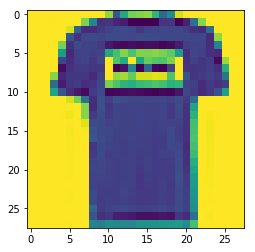

In [33]:
import matplotlib.pyplot as plt
import numpy as np
filter = np.flipud(np.dot(np.ones([28,28]),-1*np.eye(28)))
image = filter*tri[1]
plt.imshow(image)

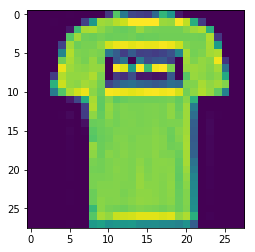

In [22]:
plt.imshow(tri[1])